# EXPLANATIONS

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import cv2

from robot_vision.recognition import predefined

from robot_vision.recognition.predefined import PREDEFINED_RECOGNIZERS
from robot_vision.explanation.predefined import PREDEFINED_EXPLAINERS

from robot_vision.utils import plotting

predefined.MODELS_FOLDER = '../robot_vision/models'
predefined.USER_FACES_FOLDER = '../robot_vision/user_faces'

d:\ProgramData\Anaconda3\envs\age_gender\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


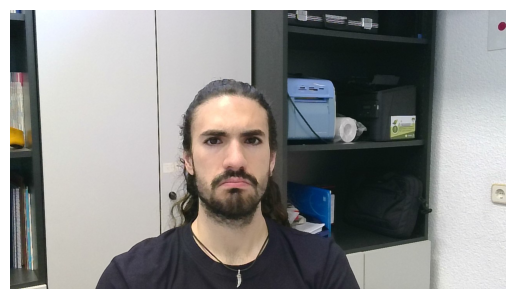

In [34]:
img_path = 'resources/sadness.jpg'
img = cv2.imread(img_path)
plotting.show_img(img)

## Facial Expression Recognition

Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: C:\Users\Xavi/.insightface\models\buffalo_l\1k3d68.onnx landmark_3d_68
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: C:\Users\Xavi/.insightface\models\buffalo_l\2d106det.onnx landmark_2d_106
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\Xavi/.insightface\models\buffalo_l\det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: C:\Users\Xavi/.insightface\models\buffalo_l\genderage.onnx genderage
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: C:\Users\Xavi/.insightface\models\buffalo_l\w600k_r50.onnx recognition
set det-size: (64, 64)
1/1 [==============================] - 0s 115ms/step


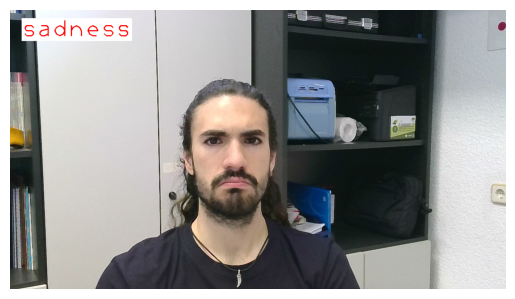

In [35]:
facial_expression_recognizer = predefined.PREDEFINED_RECOGNIZERS['expression']['VGG19']()
expression = facial_expression_recognizer.get_facial_expression(img)
plotting.show_img(plotting.draw_detections(img, expression=expression))

### LIME

100%|██████████| 2001/2001 [00:04<00:00, 427.69it/s]


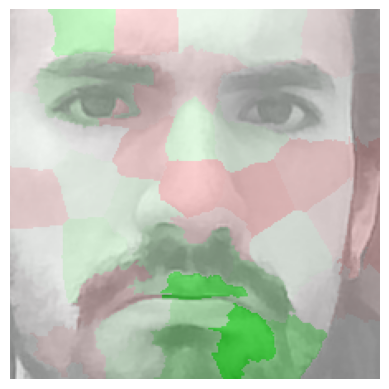

In [52]:
explainer = PREDEFINED_EXPLAINERS['lime']
exp_img = facial_expression_recognizer.get_explanation(img, explainer)
plotting.show_img(exp_img)

### RISE

100%|██████████| 2001/2001 [00:05<00:00, 342.91it/s]


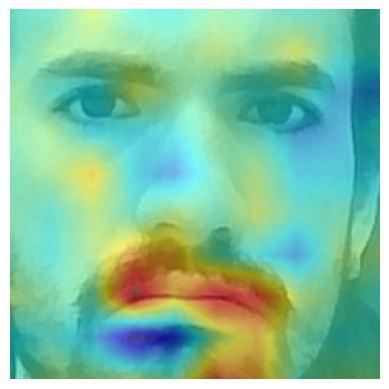

In [50]:
explainer = PREDEFINED_EXPLAINERS['rise']
exp_img = facial_expression_recognizer.get_explanation(img, explainer)
plotting.show_img(exp_img)

### KERNEL SHAP

100%|██████████| 1/1 [00:04<00:00,  4.98s/it]


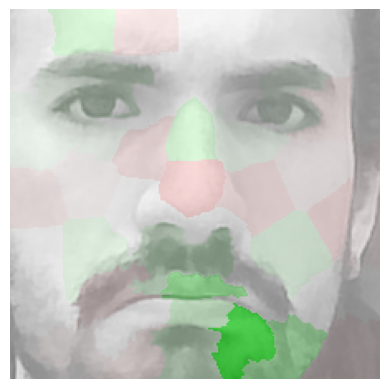

In [51]:
explainer = PREDEFINED_EXPLAINERS['kernel_shap']
exp_img = facial_expression_recognizer.get_explanation(img, explainer)
plotting.show_img(exp_img)

### OCCLUSION

100%|██████████| 1682/1682 [00:02<00:00, 563.60it/s]


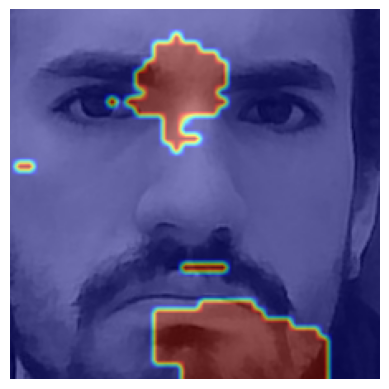

In [66]:
explainer = PREDEFINED_EXPLAINERS['occlusion_sensitivity']
exp_img = facial_expression_recognizer.get_explanation(img, explainer)
plotting.show_img(exp_img)

### LOCO

100%|██████████| 18/18 [00:00<00:00, 951.29it/s]


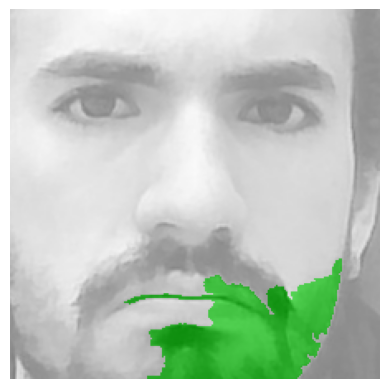

In [46]:
explainer = PREDEFINED_EXPLAINERS['loco']
exp_img = facial_expression_recognizer.get_explanation(img, explainer)
plotting.show_img(exp_img)

### UNIVARIATE

100%|██████████| 18/18 [00:00<00:00, 154.78it/s]


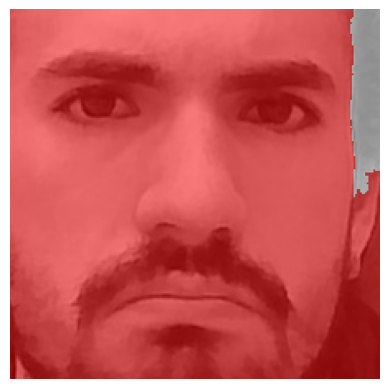

In [47]:
explainer = PREDEFINED_EXPLAINERS['univariate']
exp_img = facial_expression_recognizer.get_explanation(img, explainer)
plotting.show_img(exp_img)

### SHAP

100%|██████████| 2352/2352 [00:05<00:00, 431.71it/s]


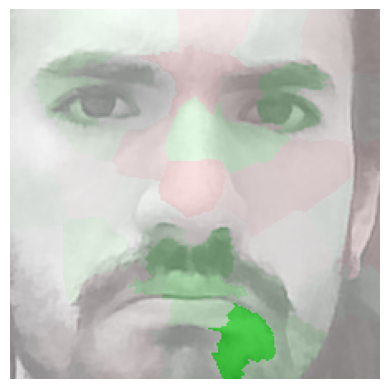

In [48]:
explainer = PREDEFINED_EXPLAINERS['shap']
exp_img = facial_expression_recognizer.get_explanation(img, explainer)
plotting.show_img(exp_img)

## Gender Estimation: MiVOLO

Model summary (fused): 268 layers, 68125494 parameters, 0 gradients


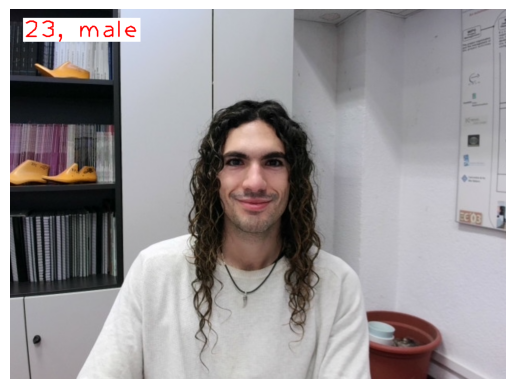

In [54]:
age_gender_detector = predefined.PREDEFINED_RECOGNIZERS['age_gender']['MiVOLO']()
age, gender = age_gender_detector.get_age_gender(img)
plotting.show_img(plotting.draw_detections(img, age=age, gender=gender))

Model summary (fused): 268 layers, 68125494 parameters, 0 gradients


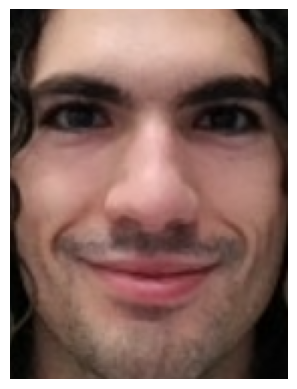

In [55]:
face_detector = PREDEFINED_RECOGNIZERS['face_detection']['YOLOv8']()
bbox = face_detector.get_bbox(img)
face_img = img[bbox[1]:bbox[3], bbox[0]:bbox[2]]
plotting.show_img(face_img)

### LIME

100%|██████████| 1001/1001 [01:14<00:00, 13.47it/s]


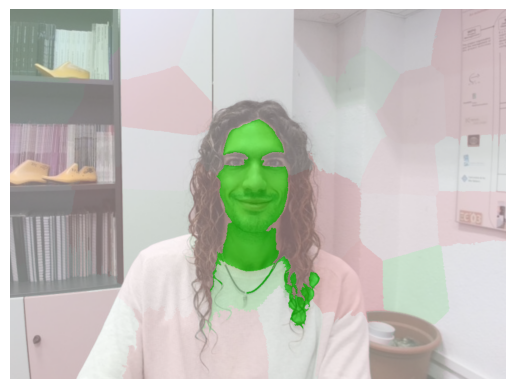

In [22]:
explainer = PREDEFINED_EXPLAINERS['lime']
exp_img = age_gender_detector.get_explanation(img, explainer)
plotting.show_img(exp_img)

100%|██████████| 1001/1001 [00:40<00:00, 24.83it/s]


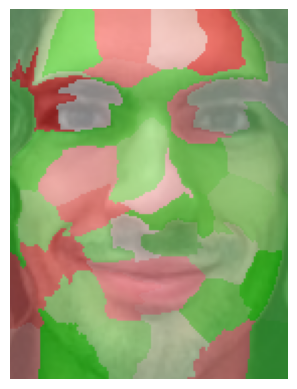

In [ ]:
explainer = PREDEFINED_EXPLAINERS['lime']
exp_img = age_gender_detector.get_explanation(face_img, explainer)
plotting.show_img(exp_img)